### Exercici 1
#### Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [497]:
import numpy as np #libreria para trabajar con matrices
import pandas as pd #librería para dataframes 
import matplotlib.pyplot as plt #librería gráfica
import seaborn as sns #librería gráfica avanzada basada en matplotlib
import warnings #librería de gestión de warnings

warnings.filterwarnings('ignore')

In [498]:
tips = sns.load_dataset("tips") 
#lee el dataset tips

In [499]:
tips.shape 
#muestra filas y columnas del dataframe

(244, 7)

In [500]:
tips.ndim 
#muestra dimensiones (1 fila x 1 columna = 2D) del dataframe

2

In [501]:
tips.columns 
#muestra el nombre de las variables (aka características) del dataframe

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [502]:
tips.head() #muestra un sample de las primeras cinco filas

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [503]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head() 
#se añade una columna que es el porcentaje que representa la propina
#esta columna da una idea más exacta del valor de la propina

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


In [504]:
tips.dtypes 
#muestra los tipos de objeto del dataset

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
tip_pct        float64
dtype: object

total_bill = cuenta total

tip = propina 

sex = sexo del pagador de la cuenta (male/female)

smokers = fumadores en el grupo (yes/no)

day = día de la semana (Thursday, Friday, Saturday, Sunday)

time = momento del servicio (lunch, dinner)

size = tamaño del grupo

tip_pct = Porcentaje de la propina respecto a la cuenta total

(todas las cantidades son el dólares)

In [505]:
tips.describe()
#descripción de los valores estadísticos más representativos
#count: número de observaciones no nulas
#mean: valor medio de las observaciones
#std: desviación estandar de las observaciones
#min: valor mínimo de las observaciones
#25%: un 25% de las observaciones están por debajo de este valor
#50%: un 50% de las observaciones están por debajo de este valor
#75%: un 75% de las observaciones están por debajo de este valor
#max: valor máximo de las observaciones


,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [506]:
round(tips.describe(include='all'), 3)
#en la descripción ALL se incluyen todas las medidas y además se redondea a 3 decimales
#las nuevas medidas:
#unique: número de observaciones únicas (para  categorías)
#top: observación que más se repite (para categorías)
#freq: número de veces que se repite la observación top (para categorías)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


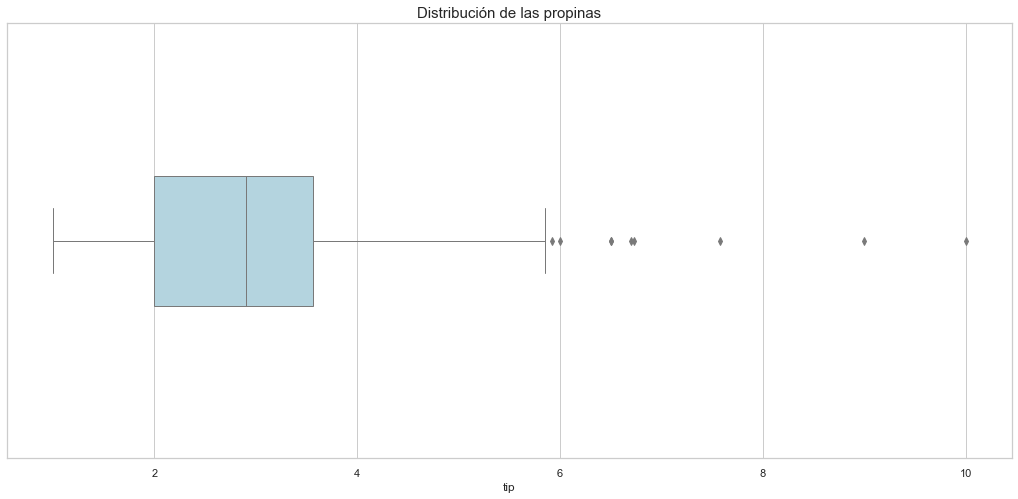

In [507]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, linewidth=1, width=0.3)
#la gráfica boxplot muestra los valores estadísticos más representativos
#la caja representa los valores en el percentil entre 75% y el 25%
#la linea divisoria de la caja representa el valor medio
#los bigotes (whiskers) representa el valor máx/min o 1,5*altura caja
#los outliers son los valores que quedan fuera de los bigotes
ax.set_title("Distribución de las propinas", fontsize=15)
plt.show()

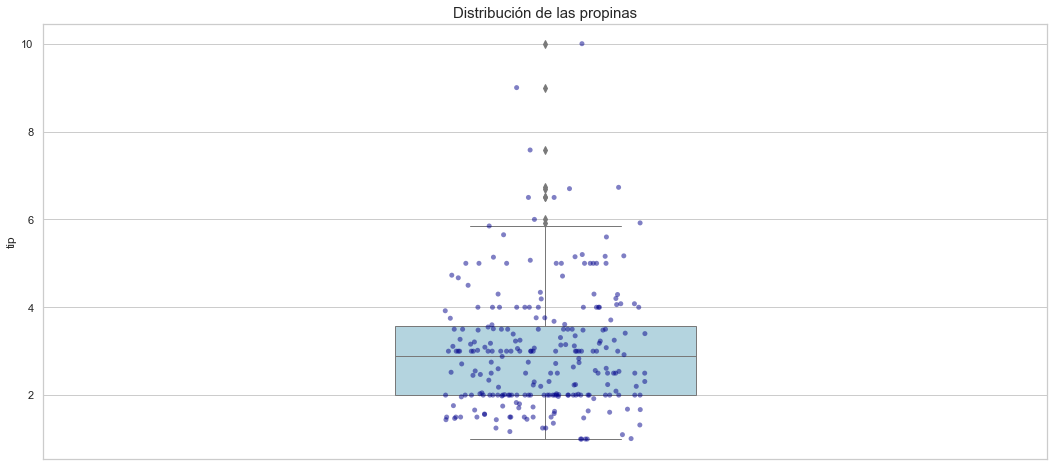

In [508]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)
#se superpone un stripplot sobre el boxplot para ver la distribución de observaciones
#el stripplot es un buen complemento para un diagrama de caja
ax.set_title("Distribución de las propinas", fontsize=15)
plt.show()

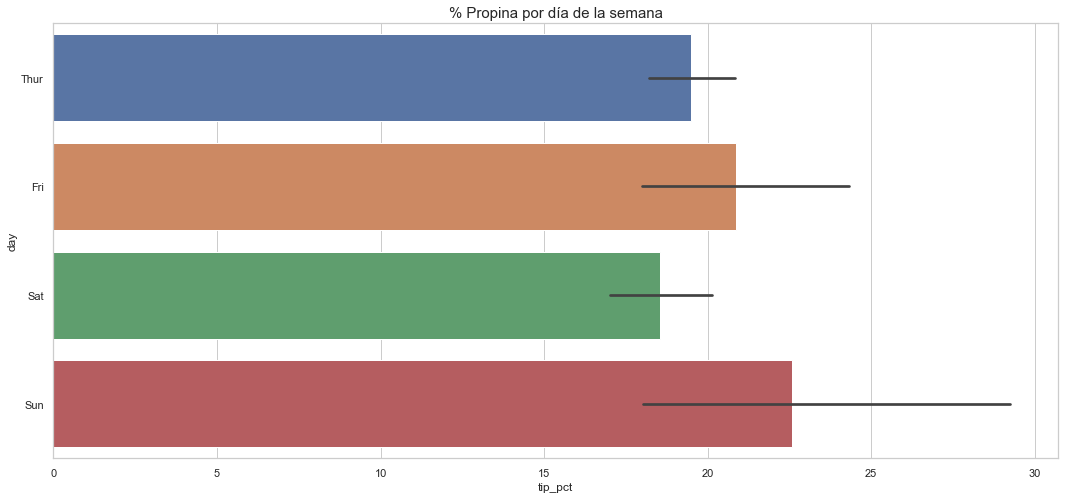

In [509]:
ax = sns.barplot(x='tip_pct', y='day', data=tips)
#diagrama de barras con el valor medio del porcentaje de propina por día
#y la variabilidad mediante el uso de barras de error
ax.set_title("% Propina por día de la semana", fontsize=15)
plt.show()

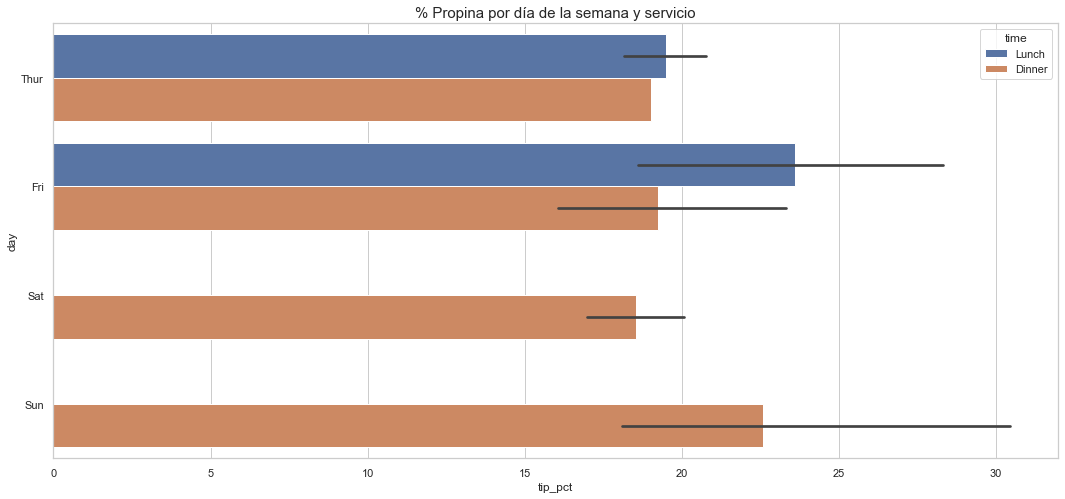

In [510]:
ax = sns.barplot(x='tip_pct', y='day', hue='time', data=tips)
sns.set(style="darkgrid")
#diagrama de barras con el valor medio del %propina por día
#en función del momento del día
ax.set_title("% Propina por día de la semana y servicio", fontsize=15)
plt.show()

### Gráfico de 1 Variable 
#### 1 variable numérica (tip_pct)

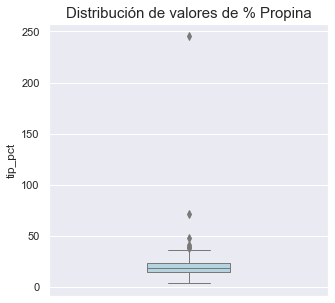

In [511]:
ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(y="tip_pct", data=tips,  color='lightblue', fliersize=5, linewidth=1 , width=0.3);
ax.set_title("Distribución de valores de % Propina", fontsize=15)
plt.show()
#hay un valor que distorsiona la gráfica ya que queda muy lejos del whisker

### Gráfico de 2 Variables 
#### 1 variable categórica (day) y 1 numérica (tip_pct)

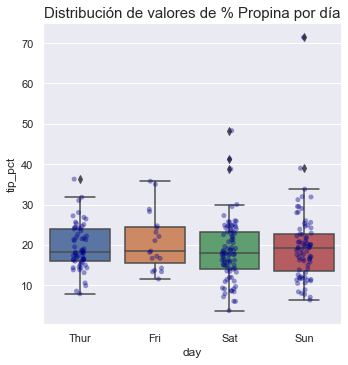

In [512]:
ax = sns.catplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);
#se filtra el valor que distorsiona el gráfico
ax.set_title("Distribución de valores de % Propina por día", fontsize=15)
plt.show()

### Gráfico de 3 Variables 
#### 2 variables categóricas (day, time) y 1 numérica (tip_pct)

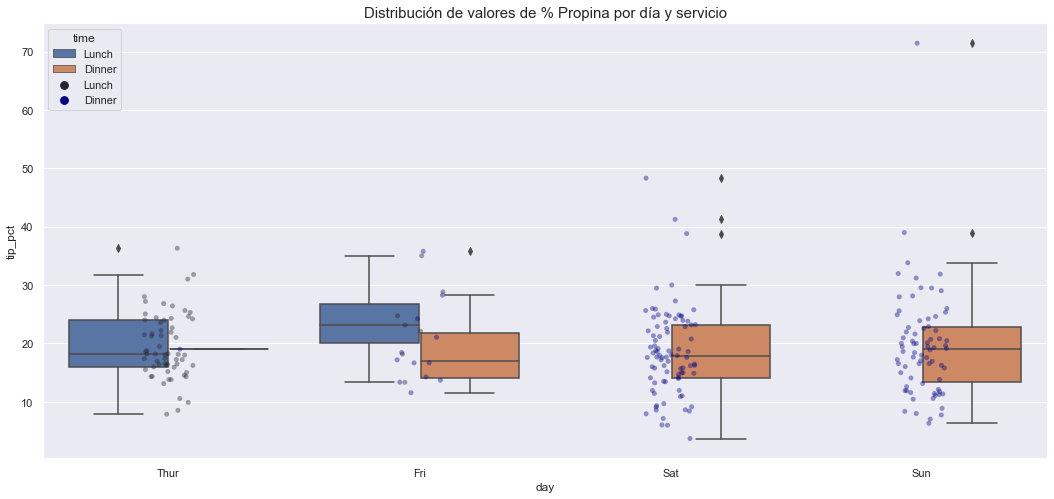

In [513]:
sns.boxplot(x='day', y='tip_pct', hue = 'time', data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);
ax.set_title("Distribución de valores de % Propina por día y servicio", fontsize=15)
plt.show()

### Gráfico de 4 Variables 
#### 3 variables categóricas (day, time, smoker) y 1 numérica (tip_pct)

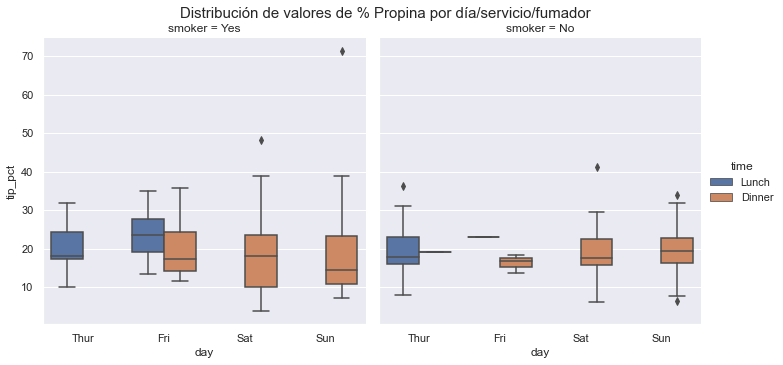

In [514]:
ax = sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='box', data=tips[tips.tip_pct < 245]);
ax.fig.suptitle("Distribución de valores de % Propina por día/servicio/fumador", fontsize=15, y=1.01)
plt.show()

### Exercici 2
#### Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [515]:
import numpy as np #libreria para trabajar con matrices
import pandas as pd #librería para dataframes 
import matplotlib.pyplot as plt #librería gráfica
import seaborn as sns #librería gráfica avanzada basada en matplotlib
import warnings #librería de gestión de warnings

warnings.filterwarnings('ignore')

In [516]:
df_movies = pd.read_table('movies.dat', encoding = "ISO-8859-1", sep = r'::', header = None, names=['título','género'], index_col = 0)
#movies.dat se ha abierto con el editor notepad para ver su estructura
#es un listado de una columna sin cabeceras, cada fila contiene un número, título de película y generos separados por dos puntos (::)
#el parámetro "sep" define el separador que se usará utilizando el código regex
#en principio se crearán tres columnas número, título y genero
df_movies

,título,género
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama


In [517]:
print("Shape (rows x columns): " + str(df_movies.shape))
print("Dimensions: " + str(df_movies.ndim))
print("Columns: " + str(df_movies.columns))
print("Objects:\n" + str(df_movies.dtypes))
#información de dataframe actual

Shape (rows x columns): (3883, 2)
Dimensions: 2
Columns: Index(['título', 'género'], dtype='object')
Objects:
título    object
género    object
dtype: object


In [518]:
df_movies.describe(include='all')
#información cuantificada del dataframe

,título,género
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843


In [519]:
df_año = df_movies.título.str.rsplit('(',n=1,expand=True)
#se crea un dataframe provisional donde se separa título y año 
#se usa metodo pd.str.rsplit para empezar desde la derecha por si hay títulos con ()
#argumentos: separador: paréntesis, núm separaciones:1, expandir a columna:sí
df_año[1] = df_año[1].str.strip(')')
#se elimina el último paréntesis
df_año.columns = ['título', 'año']
#se agrega el nombre de las columnas
df_año = df_año.astype({'año': 'int32'}, errors='raise')
#convertimos la fecha de string a número entero para poder trabajar mejor
#para ello usamos la función casting de pandas astype
df_año.dtypes
#comprobamos que el cambio se ha realizado correctamente

título    object
año        int32
dtype: object

In [520]:
df_género = df_movies.género.str.split('|', expand=True)
#se crea un dataframe provisional donde se separan los géneros
#argumentos: separador: línea vertical, expandir a columna:sí
df_género.columns = ['género principal','subgénero 1', 'subgén. 2', 'subgén. 3', 
                     'subgén. 4', 'subgén. 5' ]
df_género = df_género.fillna(value=np.nan)
#los valores None se sustituyen por NaN para poder gestionarlos mejor
df_género

,género principal,subgénero 1,subgén. 2,subgén. 3,subgén. 4,subgén. 5
1,Animation,Children's,Comedy,NaN,NaN,NaN
2,Adventure,Children's,Fantasy,NaN,NaN,NaN
3,Comedy,Romance,NaN,NaN,NaN,NaN
4,Comedy,Drama,NaN,NaN,NaN,NaN
5,Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3948,Comedy,NaN,NaN,NaN,NaN,NaN
3949,Drama,NaN,NaN,NaN,NaN,NaN
3950,Drama,NaN,NaN,NaN,NaN,NaN
3951,Drama,NaN,NaN,NaN,NaN,NaN


In [521]:
df_full_movies = pd.concat([df_año, df_género], axis = 1)
#con los dataframes provisionales se crea un nuevo dataframe
df_full_movies

,título,año,género principal,subgénero 1,subgén. 2,subgén. 3,subgén. 4,subgén. 5
1,Toy Story,1995,Animation,Children's,Comedy,NaN,NaN,NaN
2,Jumanji,1995,Adventure,Children's,Fantasy,NaN,NaN,NaN
3,Grumpier Old Men,1995,Comedy,Romance,NaN,NaN,NaN,NaN
4,Waiting to Exhale,1995,Comedy,Drama,NaN,NaN,NaN,NaN
5,Father of the Bride Part II,1995,Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3948,Meet the Parents,2000,Comedy,NaN,NaN,NaN,NaN,NaN
3949,Requiem for a Dream,2000,Drama,NaN,NaN,NaN,NaN,NaN
3950,Tigerland,2000,Drama,NaN,NaN,NaN,NaN,NaN
3951,Two Family House,2000,Drama,NaN,NaN,NaN,NaN,NaN


In [522]:
df_full_movies['palabras'] = df_full_movies['título'].str.split()
df_full_movies['num palabras']=df_full_movies['palabras'].str.len()
#creamos una serie con el número de palabras por título

In [523]:
print("Shape (rows x columns): " + str(df_full_movies.shape))
print("Dimensions: " + str(df_full_movies.ndim))
print("Columns: " + str(df_full_movies.columns))
print("Objects:\n" + str(df_full_movies.dtypes))
print("Dataframe Description:\n" + str(round(df_full_movies.describe(include='all'), 0)))
#información cuantificada del dataframe

Shape (rows x columns): (3883, 10)
Dimensions: 2
Columns: Index(['título', 'año', 'género principal', 'subgénero 1', 'subgén. 2',
       'subgén. 3', 'subgén. 4', 'subgén. 5', 'palabras', 'num palabras'],
      dtype='object')
Objects:
título              object
año                  int32
género principal    object
subgénero 1         object
subgén. 2           object
subgén. 3           object
subgén. 4           object
subgén. 5           object
palabras            object
num palabras         int64
dtype: object
Dataframe Description:
         título     año género principal subgénero 1 subgén. 2 subgén. 3  \
count      3883  3883.0             3883        1858       536       115   
unique     3841     NaN               18          17        15        13   
top     Hamlet      NaN            Drama       Drama  Thriller  Thriller   
freq          5     NaN             1176         381       120        40   
mean        NaN  1986.0              NaN         NaN       NaN       NaN   
s

### Gráfico de 1 Variable 
#### 1 variable numérica (año)

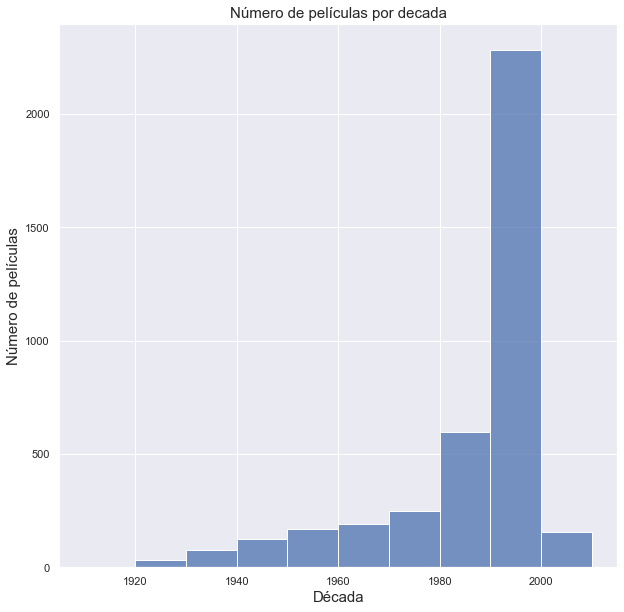

In [524]:
ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df_full_movies, x="año", stat="count", binwidth=10, binrange=(1910,2010))
ax.set_title("Número de películas por decada", fontsize=15)
ax.set_xlabel('Década', fontsize=15) 
ax.set_ylabel('Número de películas', fontsize=15)
plt.show()
ax.figure.savefig("fig01.png")

### Gráfico de 2 Variables
#### 1 variable categórica (Género principal) y 1 numérica (año)

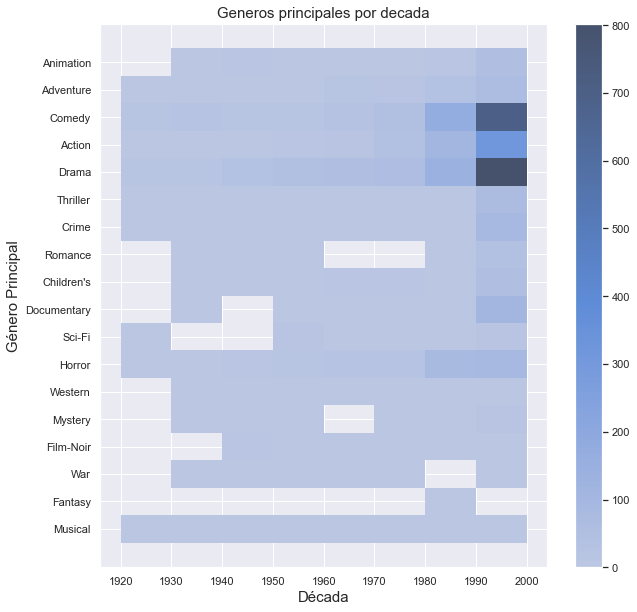

In [525]:
ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df_full_movies[df_full_movies.año >= 1920], y="género principal", x="año", binwidth=10, cbar=True)
ax.set_title("Generos principales por decada", fontsize=15)
ax.set_xlabel('Década', fontsize=15) 
ax.set_ylabel('Género Principal', fontsize=15)
plt.show()
ax.figure.savefig("fig02.png")

### Gráfico de 3 Variables
#### 1 variable categórica (Género principal) y 2 numéricas (año, frecuencia)

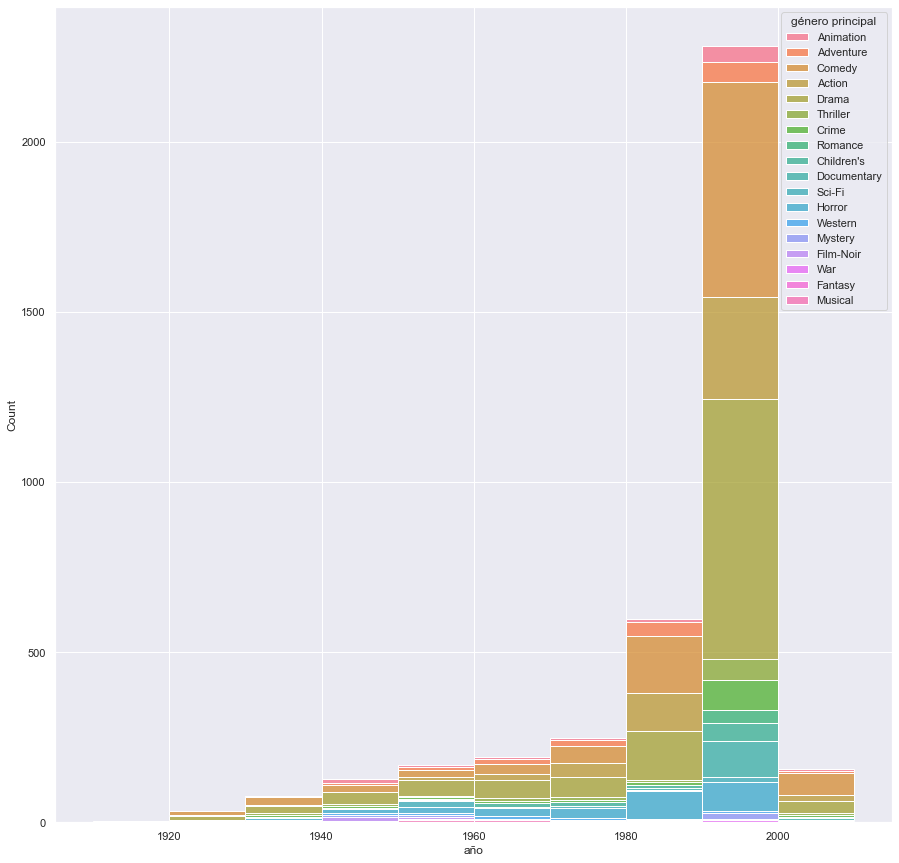

In [526]:
ax = plt.subplots(figsize=(15,15))
ax = sns.histplot(data=df_full_movies, x='año', hue='género principal', multiple='stack',binwidth=10, binrange=(1910,2010))
plt.show()
ax.figure.savefig("fig03.png")

### Exercici 3
#### En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

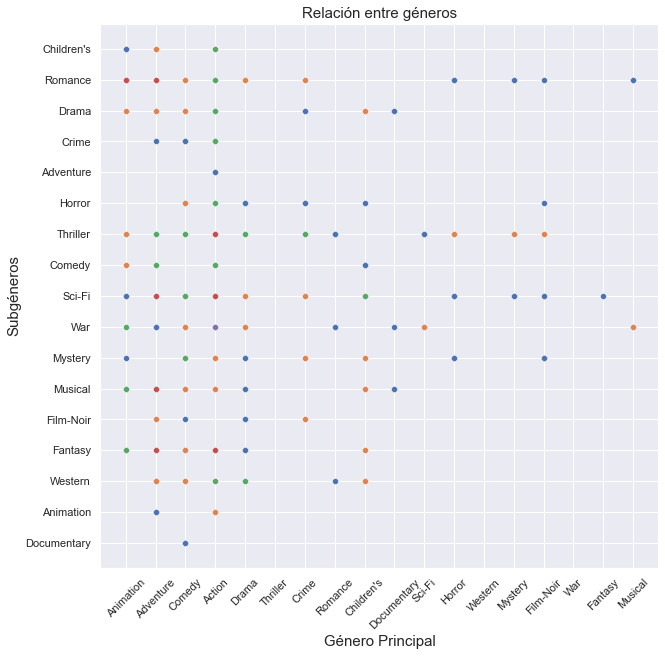

In [527]:
ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(data=df_full_movies, x="género principal", y="subgénero 1")
ax = sns.scatterplot(data=df_full_movies, x="género principal", y="subgén. 2")
ax = sns.scatterplot(data=df_full_movies, x="género principal", y="subgén. 3")
ax = sns.scatterplot(data=df_full_movies, x="género principal", y="subgén. 4")
ax = sns.scatterplot(data=df_full_movies, x="género principal", y="subgén. 5")
ax.set_title("Relación entre géneros", fontsize=15)
ax.set_xlabel('Género Principal', fontsize=15) 
ax.set_ylabel('Subgéneros', fontsize=15)
plt.xticks(rotation=45)
plt.show()
ax.figure.savefig("fig04.png")